# Galway Mayo Institute of Technology

| Header | Description |
| --- | --- |
| `Author` | Tomas O'Malley (G00361128)@gmit.ie |
| `Course` | Software Development GA_KSOAG_H08 Y4  |
| `Module` | Emerging Technologies   |
| `Program` | Wind turbine power Model |
| `Langauge` | Python |
| `Weighting` | 50% |
| `Year of Study` | 4 |


# Problem Sheet
In this project you must create a web service that uses machine learning to make pre- dictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.





# Research and Analysis

- Use of the libraries shown on tutorials via moodle 
    - keras Deep Learning in Python 
    - TensorFlow machine learning Library Python
    - matplotlib https://matplotlib.org/tutorials/introductory/pyplot.html
    - Reading a scv using the panda data frames library https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    - Flask templaet control  https://medium.com/analytics-vidhya/flask-how-create-a-responsive-navbar-146c7213df60






In [39]:

# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [40]:
# Begin Plot 

# Plot Styling 
plt.style.use("ggplot")

# Plot sizing 
plt.rcParams['figure.figsize'] = [14,8]

In [41]:
# Read csv Dataset provided by Moodle Portal 
powerDataModel = pd.read_csv("powerproduction.csv")

In [47]:
# Build our model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [48]:
model.fit(powerDataModel['speed'], powerDataModel['power'], epochs=5, batch_size=10)



Epoch 1/5
50/50 [==============================] - 0s 755us/step - loss: 4193.8388
Epoch 2/5
50/50 [==============================] - 0s 837us/step - loss: 4173.6960
Epoch 3/5
50/50 [==============================] - 0s 776us/step - loss: 3807.1018
Epoch 4/5
50/50 [==============================] - 0s 775us/step - loss: 3336.2340
Epoch 5/5
50/50 [==============================] - 0s 775us/step - loss: 3194.4078


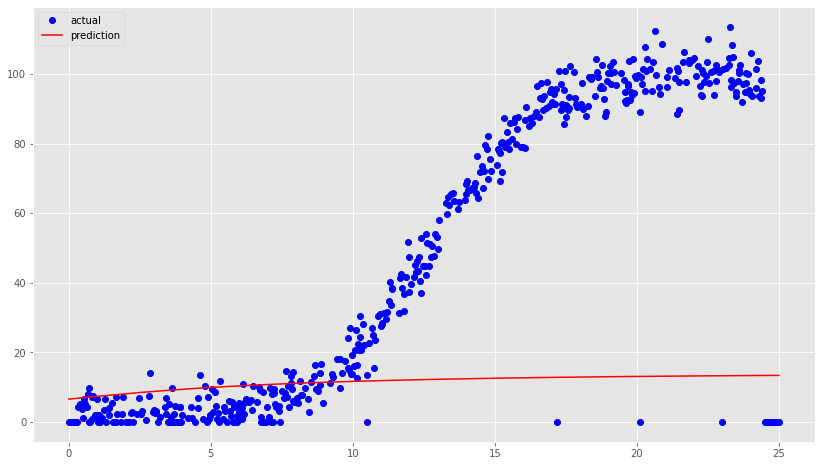

In [49]:
plt.plot(powerDataModel['speed'], powerDataModel['power'], "bo", label='actual')
plt.plot(powerDataModel['speed'], model.predict(powerDataModel['speed']),'r', label='prediction')
plt.legend();


In [38]:
# Save the ouput of the model 
model.save("powerProduction.h5")


# User input
user = int(input("Enter val: "));
powerDataModel['speed'] = user
powerDataModel['power'] = model.predict(powerDataModel['speed'])
prediction = powerDataModel['power'][0]
# print the prediction to console 
print("Prediction: ",prediction)


Enter val: 10
Prediction:  18.686344


### END

# Reflection 


# References
https://machinelearningmastery.com/save-load-keras-deep-learning-models/
